In [35]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [36]:
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [37]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


About the Dataset
It has the following columns:

sl_no : Serial Number

gender : Gender- Male='M',Female='F'

ssc_p : Secondary Education percentage- 10th Grade

ssc_b : Board of Education- Central/ Others

hsc_p : Higher Secondary Education percentage- 12th Grade

hsc_b : Board of Education- Central/ Others

hsc_s : Specialization in Higher Secondary Education

degree_p : Degree Percentage

degree_t : Under Graduation(Degree type)- Field of degree education

workex : Work Experience

etest_p : Employability test percentage ( conducted by college)

specialisation : Post Graduation(MBA)- Specialization

mba_p : MBA percentage

status : Status of placement- Placed/Not placed

salary : Salary offered by corporate to candidate

In [38]:
df.shape

(215, 15)

In [39]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


From describe it can be found that average salary of the students is 288655.405405

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Few null values are found in salary,that means there are people who have not secured a job.Let us look about this in detail

In [41]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

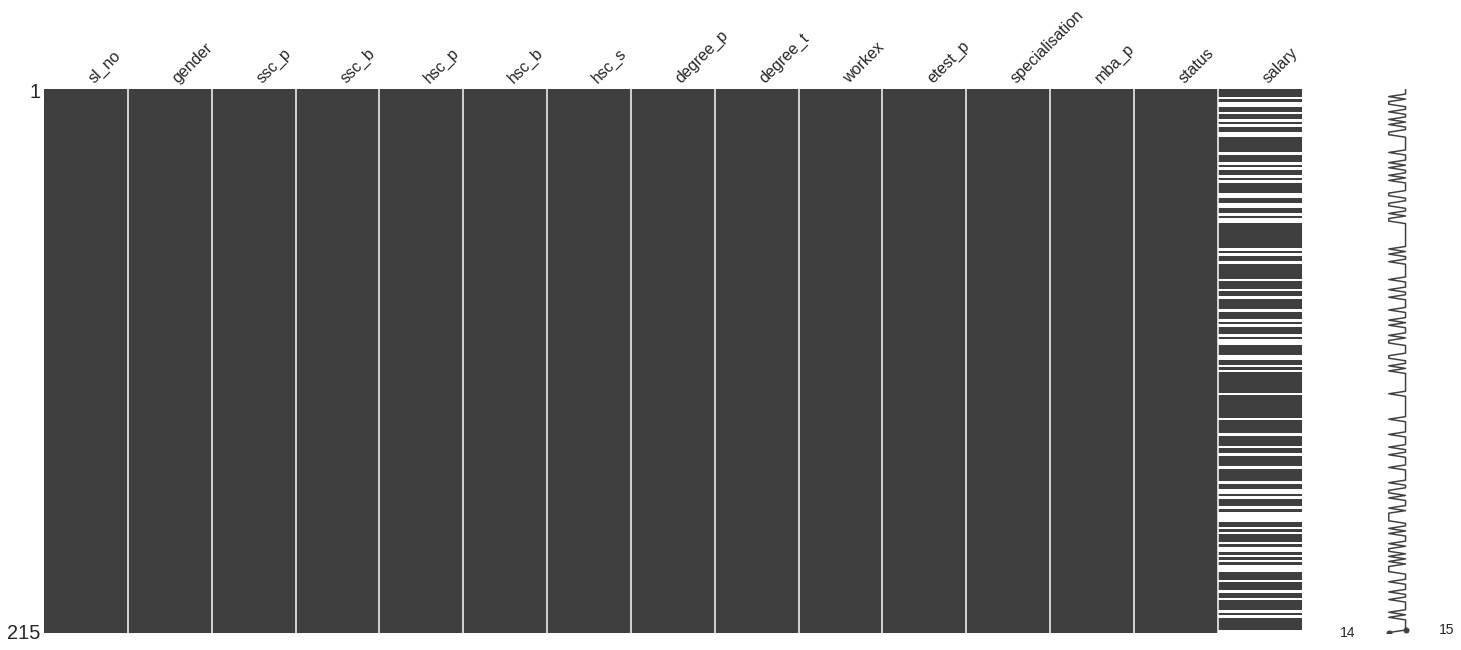

In [42]:
import missingno as msno
msno.matrix(df)
plt.show()

In [43]:
missing_salary_percentage=df['salary'].isnull().sum()/len(df)*100
print(round(missing_salary_percentage,2),'%')

31.16 %


This means that around 31% candidates were not placed which is sad but let's see what were the reasons :)

In [44]:
column = df.select_dtypes(include=['object'])
for col in column:
  display(df[col].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

Profile Report

#EDA

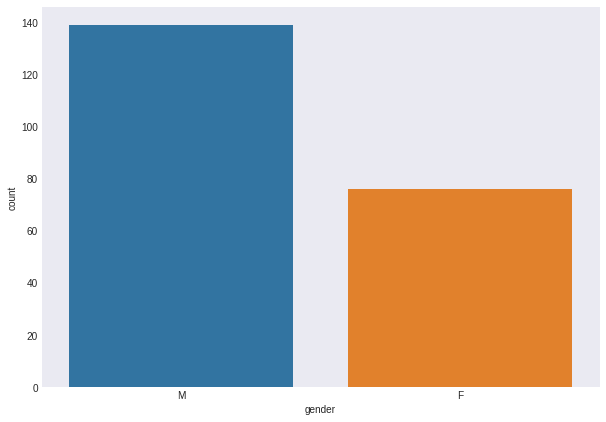

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=df)
labels=df['gender']

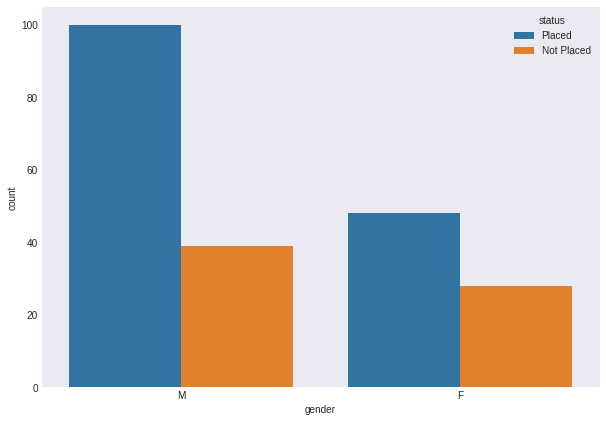

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',hue='status',data=df)
plt.show()

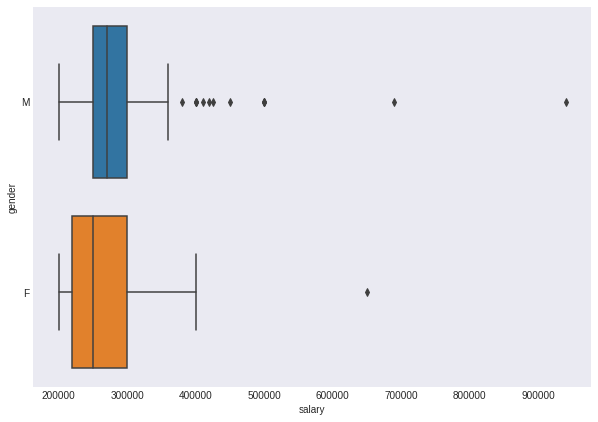

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(y='gender',x='salary',data=df)


OBSERVATIONS:
<br>We have samples of 139 Male studets and 76 Female students.
<br>The number of male students are almost double as compared to female.
<br>More outliers on Male,Male students are getting high CTC jobs.
<br>Male students are offered slightly greater salary than female on an average
<br>More female students got placed when compared to male students in terms of respective percentage

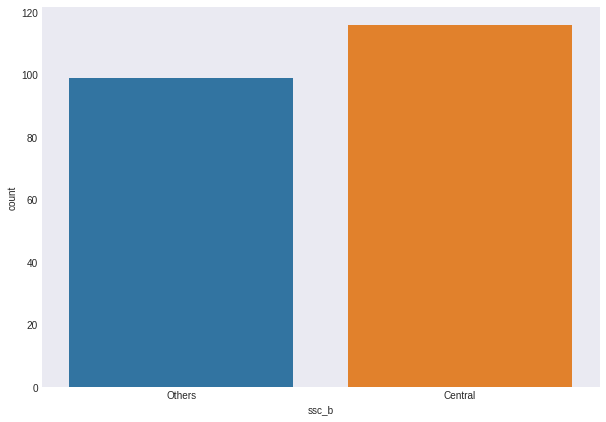

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(x='ssc_b',data=df)

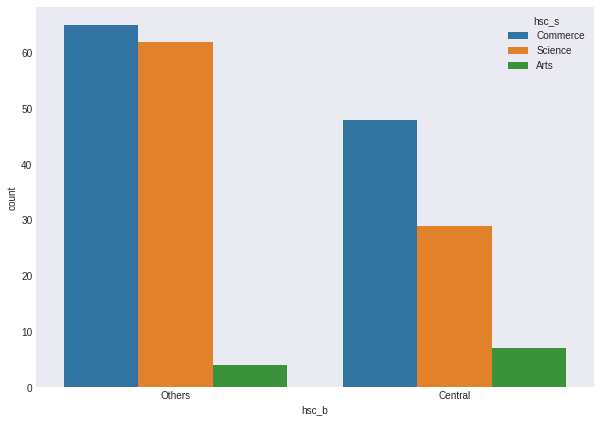

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(x='hsc_b',hue='hsc_s',data=df)

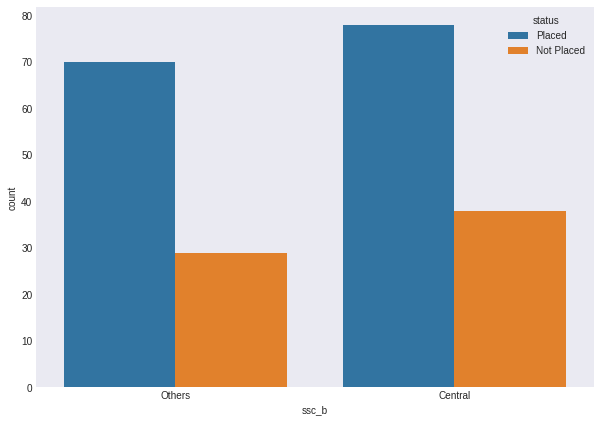

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(x='ssc_b',hue='status',data=df)

<Figure size 720x504 with 0 Axes>

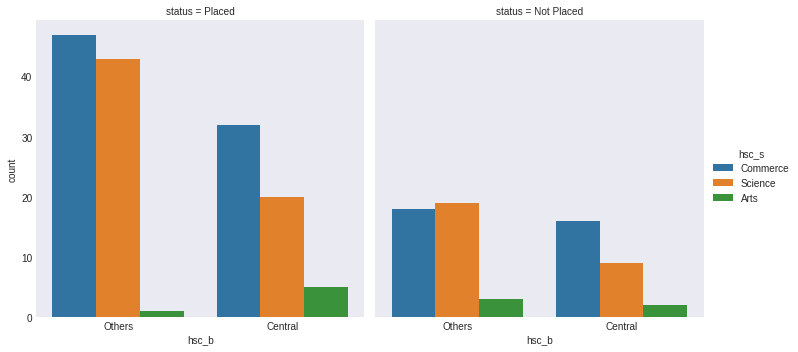

In [51]:
plt.figure(figsize=(10,7))
sns.catplot(x='hsc_b',hue='hsc_s',col='status',data=df,kind='count')

More number of students are from Central board,but not a great difference
<br>More percentage of central students are placed when compared to others
<br>There is count of central board students is very high as compared to all other boards in ssc_b but its reverse in hsc_b

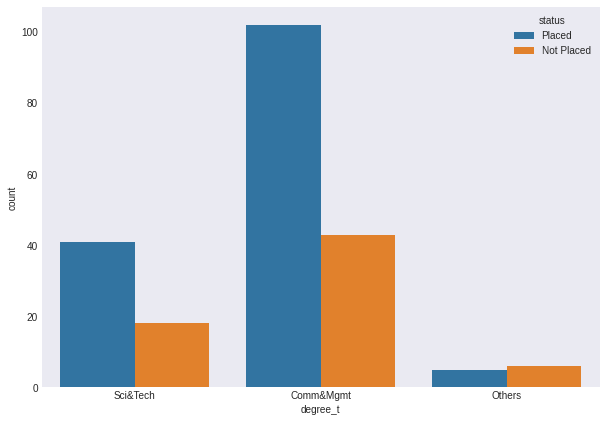

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(x='degree_t',hue='status',data=df)

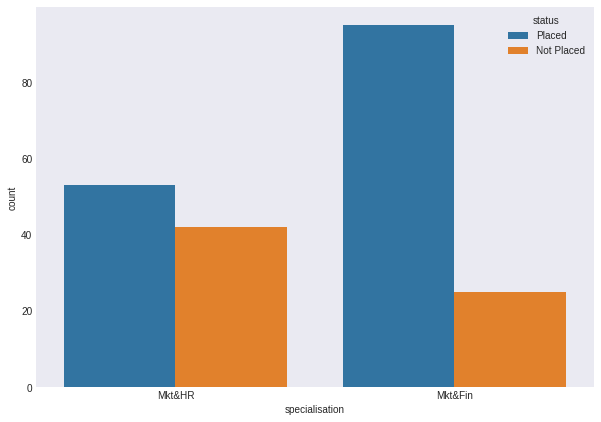

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(x="specialisation", hue='status',data=df)

Text(0.5, 1.0, 'MBA percentage')

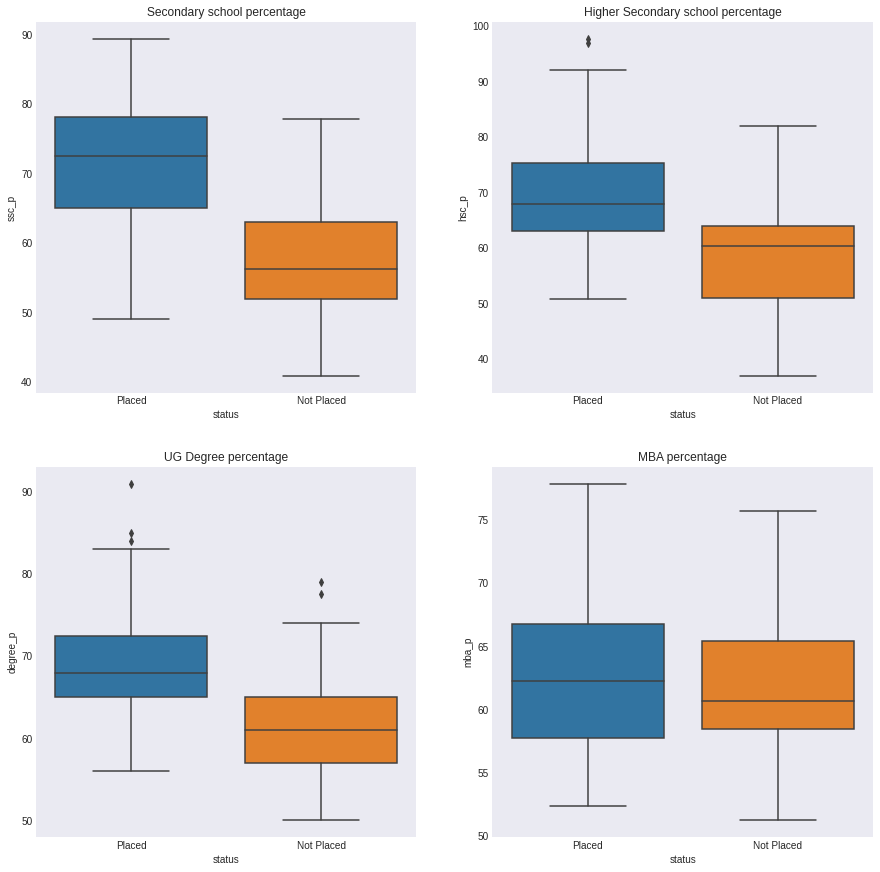

In [54]:
plt.figure(figsize=(15,15))
ax=plt.subplot(221)
sns.boxplot(x='status',y='ssc_p',data=df) 
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
sns.boxplot(x='status',y='hsc_p',data=df)
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
sns.boxplot(x='status',y='degree_p',data=df)
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
sns.boxplot(x='status',y='mba_p',data=df)
ax.set_title('MBA percentage')

Most of the candidates educational performances are between 60-80%
We can see that getting good percentages in MBA does not guarantee placement of the candidate.
Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand. So as per the plot,percentage do not influence the placement status
#### These percentages don't have any influence over their salary

Text(0.5, 1.0, 'Grnder vs Salary based on work experience')

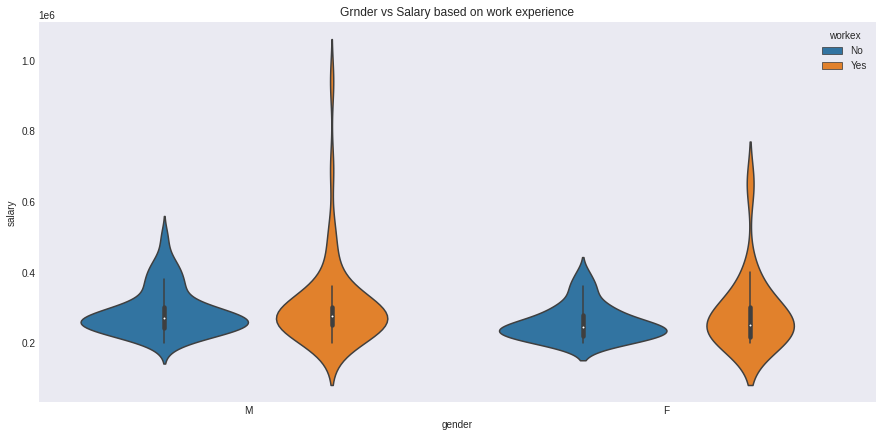

In [55]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['gender'],y=df['salary'],hue=df['workex'])
plt.title('Grnder vs Salary based on work experience')

Work Experience is a clear indicator as more work experience results in higher CTC jobs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


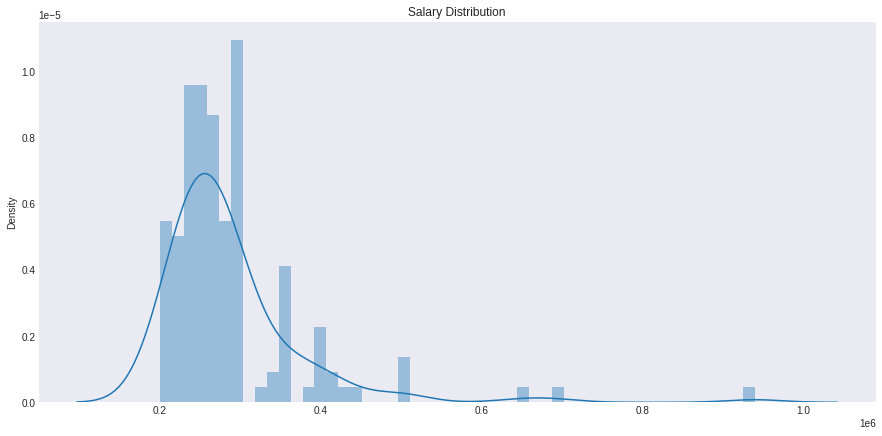

In [56]:
plt.figure(figsize=(15,7))
sns.distplot(x=df['salary'],bins=50,hist='false')
plt.title('Salary Distribution')
plt.show()

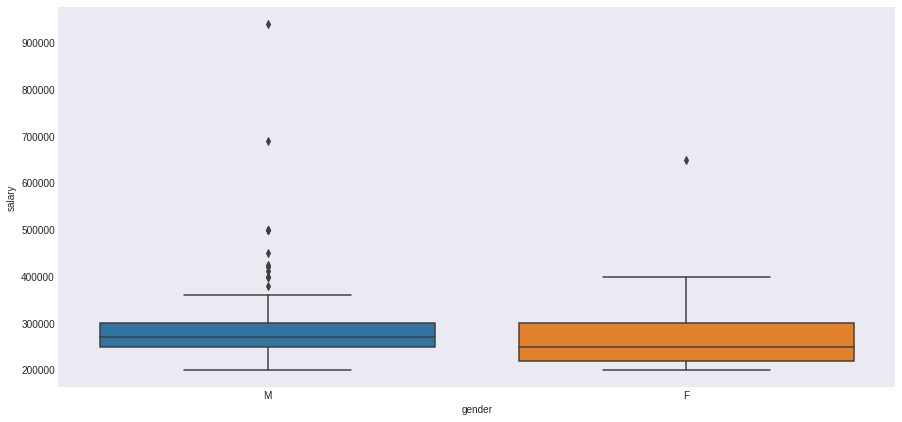

In [57]:
plt.figure(figsize=(15,7))
sns.boxplot(x='gender',y='salary',data=df) 
plt.show()

Mens average salary is higher
<br> Highest CTC is also acheived by men
<br> Most of the salaries are between 200k to 400k

#Feature Engineering

In [58]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["ssc_b"] = df.ssc_b.map({"Others":0,"Central":1})
df["hsc_b"] = df.hsc_b.map({"Others":0,"Central":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

Corelation

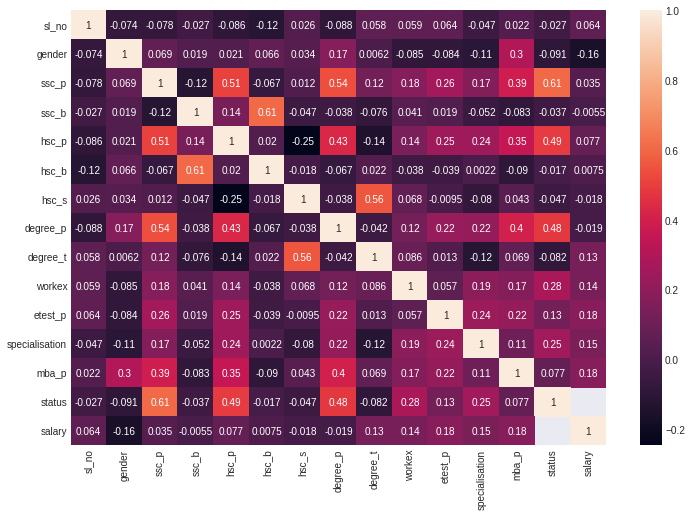

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [60]:
X = df[[ 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p',  'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify =y)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (150, 8)
X-Test: (65, 8)
Y-Train: (150,)
Y-Test: (65,)


Logistic Regression

In [67]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)

log_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, log_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.80
[[11  9]
 [ 4 41]]


The result is telling us that we have 11+41 correct predictions and 9+4 incorrect predictions

Random Forest

In [68]:
random_forest = RandomForestClassifier(n_estimators=200,criterion='gini',
 max_depth= 4 ,
 max_features= 'auto',random_state=42)
random_forest.fit(X_train, y_train)

ran_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(random_forest.score(X_test, y_test)))


Accuracy of Random Forest classifier on test set: 0.89


In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, ran_pred)
cm

array([[13,  7],
       [ 0, 45]])

The result is telling us that we have 13+47 correct predictions and 7+0 incorrect predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


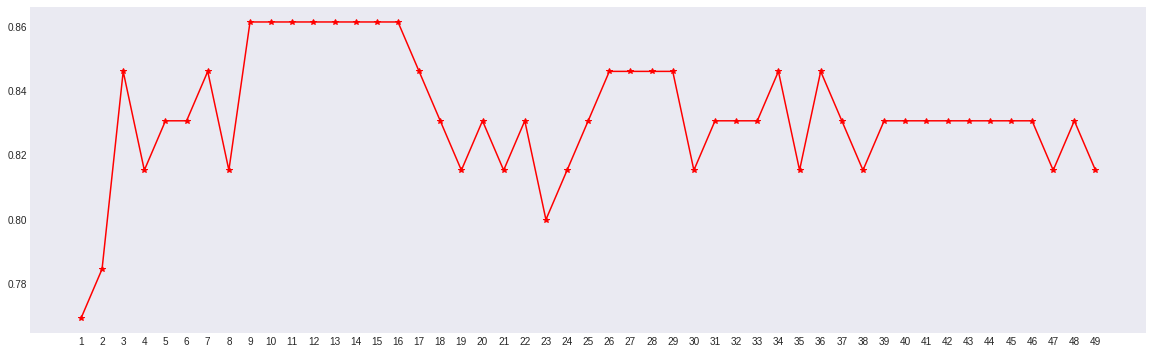

In [71]:
plt.subplots(figsize=(20,6))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*",color='r')
plt.xticks(x)
plt.show()

As we see at K between [10-17] KNN is giving maximam accuracy

KNN

In [77]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn)
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, knn_pred)
print(confusion_matrix1)

88.67
[[11  9]
 [ 0 45]]


The result is telling us that we have 11+45 correct predictions and 9+0 incorrect predictions

Gaussian Naive Bayes

In [76]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gau_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian)
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, gau_pred)
print(confusion_matrix2)

83.33
[[16  4]
 [ 4 41]]


Conclusion
<br>Here are a few things to keep in mind:
<br> Random Forest gives better accuracy
<br>Specialisations Matter. Choose the right one.
<br>Go for Internship. Work Experience helps.
<br>Don't worry about grades for salary (although you need them to get placed).

The result is telling us that we have 16+41 correct predictions and 4+4 incorrect predictions